In [153]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.fftpack import idct


Variable initialization

In [154]:
N = 32 # signal dimension
M = 32 # number of atoms in the span (for basis M = N)

C = np.zeros((N, M)) # matrix containing the standard basis (a kronecker delta in each column)
D = np.zeros((N, M)) # matrix containing the DCT basis (a DCT function in each column)


Generate the 1D-DCT basis

Text(0.5, 1.0, 'DCT basis')

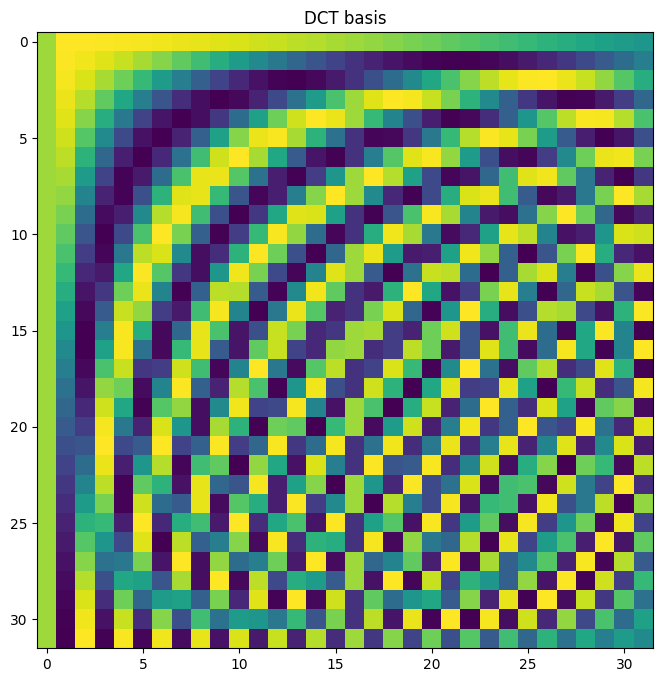

In [155]:
for i in range(M):
    D[:, i] = idct(np.eye(N)[:, i], norm='ortho')

plt.figure(figsize=(8,8))
plt.imshow(D)
plt.title('DCT basis')

# Sparsity w.r.t orthonormal dictionary D

In this section you will perform denoising of a signal that is *sparse* w.r.t. the orthornormal dictionary $D\in\mathbb{R}^{N\times N}$, i.e., the 1D-DCT dictionary.

At first, generate a vector $x_{orig}\in\mathbb{R}^N$ that is $L$-sparse, i.e. $\|x_{orig}\|_0 = L$. Use this coefficient vector $x_{orig}$, generate a noise-free signal $y\in\mathbb{R}^N$ as $y=Dx_{orig}$, and add some Gaussian noise to obtain $s = y + \eta$.

Perform the DCT denoising on the noisy signal $s$ to recover $\hat y$. Use the Hard Thresholding operator that keeps only the largest $L$ coefficients and evaluate the denoising performance


Set the sparsity level $L$

In [156]:
L = 3

Randomly define the coefficients of a sparse representation $x$ (make sure the nonzero coefficients are sufficiently large)

Text(0.5, 1.0, 'Original signal')

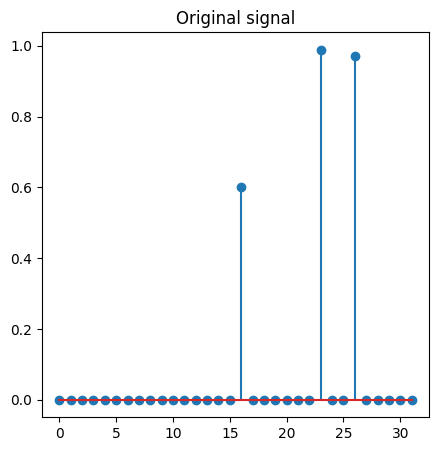

In [157]:
x_orig = np.zeros(N)
random_positions = np.random.choice(N, L, replace=False)
x_orig[random_positions] = np.random.rand(L)

# plot x_orig
plt.figure(figsize=(5,5))
plt.stem(x_orig)
plt.title('Original signal')

Synthetize the corresponding signal in the signal domain and add noise


In [158]:
y =  D @ x_orig

s = y + 0.2 * np.random.randn(N)

Plot the sparse signal

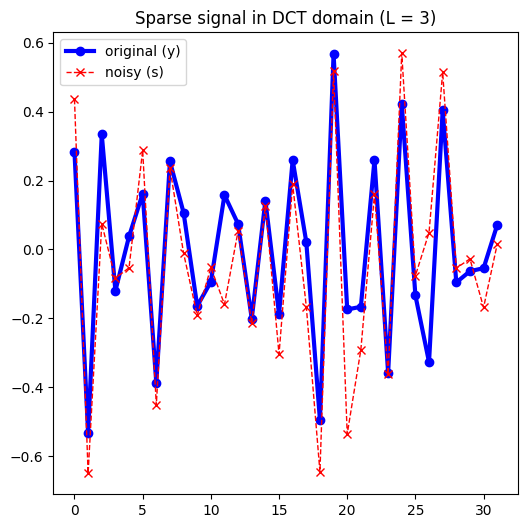

In [159]:
LN_WDT = 2
MRK_SZ = 10

plt.figure(figsize=(6,6))
plt.plot(y, 'b-o', linewidth=LN_WDT+1)
plt.plot(s, 'r--x', linewidth=LN_WDT-1)
plt.title(f'Sparse signal in DCT domain (L = {L:.0f})')
plt.legend(['original (y)', 'noisy (s)'])


### Implement the DCT denoising

This is expected to be very effective on $s$!

**Analysis**: compute the coefficients w.r.t. $D$

In [160]:
x = D.T @ s

**Hard Thresholding**: keep only the $L$ largest coefficients (absolute value)

In [161]:
x_hat = x.copy()
indices = np.argsort(np.abs(x))
x_hat[indices[:-L]] = 0

**Synthesis**: invert the transform

In [162]:
s_hat = D @ x_hat

Plot the results:
- are the denoising performance good?
- are the original coefficients $x_{orig}$ recovered by $\hat x$?

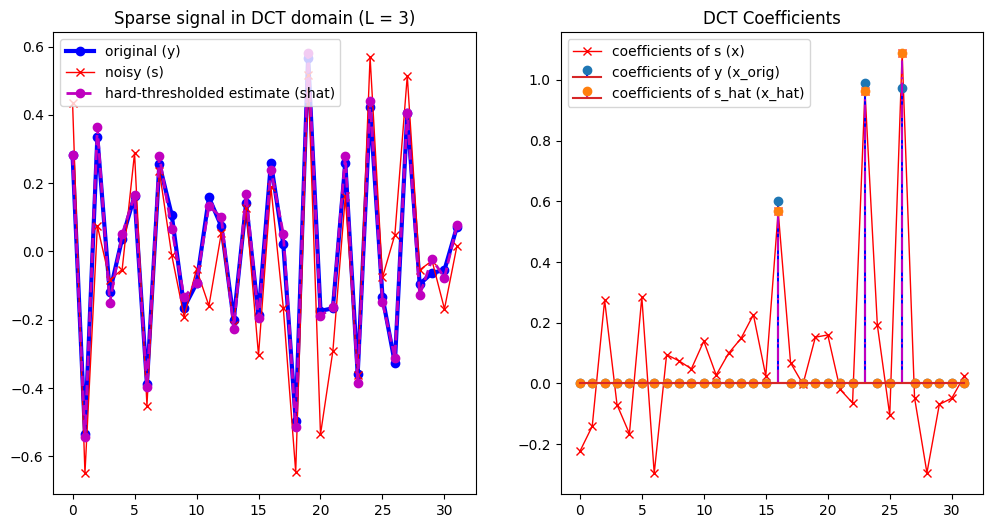

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(y, 'b-o', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-x', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm--o', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal in DCT domain (L = {L:.0f})')
ax[0].legend(['original (y)', 'noisy (s)', 'hard-thresholded estimate (shat)'])



ax[1].plot(x, 'r-x', linewidth=LN_WDT-1)
ax[1].stem(x_orig, linefmt='b-', markerfmt='C0o')
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s (x)', 'coefficients of y (x_orig)', 'coefficients of s_hat (x_hat)'])


# Sparsity w.r.t redoundant dictionary

In this section you will perform the same denoising as in the previous section with the only difference that the signal $s = y + \eta$ that you will generate is sparse w.r.t. a redoundant dictionary $A=[C, D] \in\mathbb{R}^{M \times N}$, where $C\in\mathbb{M\times M}$ is the matrix representity the canonical basis, and $D\in\mathbb{M\times M}$ is the usual 1D-DCT matrix. Therefore $A$ is a rectangular matrix, since $M < N$.

To generate signals that are sparse w.r.t. $A=[C, D]$, at first generate a signal $y$ that is $L-1$ sparse w.r.t. $D$ as you have done in the previous section. Then, add a spike to $y$ that is sparse w.r.t. $A$. Bear in mind that the spike is to be considered a signal to be reconstructed, rather than noise.

Generate the standard orthonormal basis

Text(0.5, 1.0, 'Canonical basis dimension n = 32')

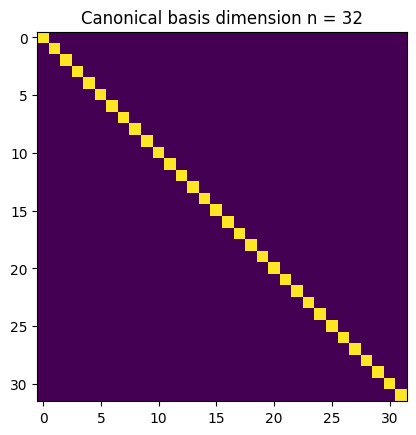

In [164]:
C = np.eye(M)

plt.figure(5)
plt.imshow(C)
plt.title(f'Canonical basis dimension n = {M}')




Generate a signal that is sparse w.r.t. D

In [165]:
x_orig = np.zeros(N)
random_positions = np.random.choice(N, L-1, replace=False)
x_orig[random_positions] = np.random.rand(L-1)
y = D @ x_orig

Randomly place a spike in the first 20 samples of $y$


C:\Users\camil\AppData\Local\Temp\ipykernel_9456\4034038359.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  spikeLocation = int(20 * np.random.rand(1))


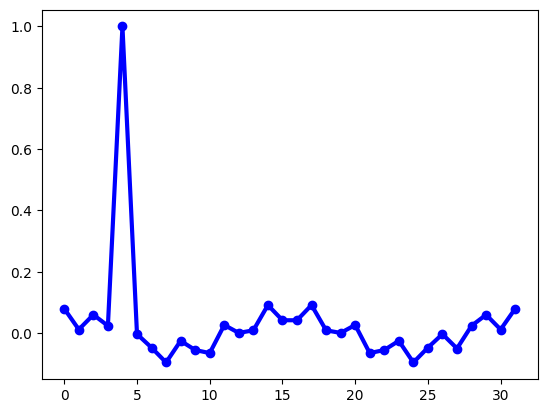

In [166]:
# choose spike location
spikeLocation = int(20 * np.random.rand(1))
# modify the signal intensity at spikeLocation
# update y
y[spikeLocation] = 1

plt.figure(5)
plt.plot(y, 'b-o', linewidth=LN_WDT+1)


Add noise to the signal

In [167]:
s = y + 0.2 * np.random.randn(N)

Perform hard thresholding by keeping the largest $L$ coefficients w.r.t. $D$ (not $A$!)

In [168]:
# analysis: compute the coefficients w.r.t. D
x = D.T @ s

# keep only the L largest coefficients (absolute value)
x_hat = x.copy()
indices = np.argsort(np.abs(x))
x_hat[indices[:-L]] = 0

# invert the transformation
s_hat = D @ x_hat

Plot the results and compare them to the one obtained in the previous section.

Is the signal $s$ denoised properly?

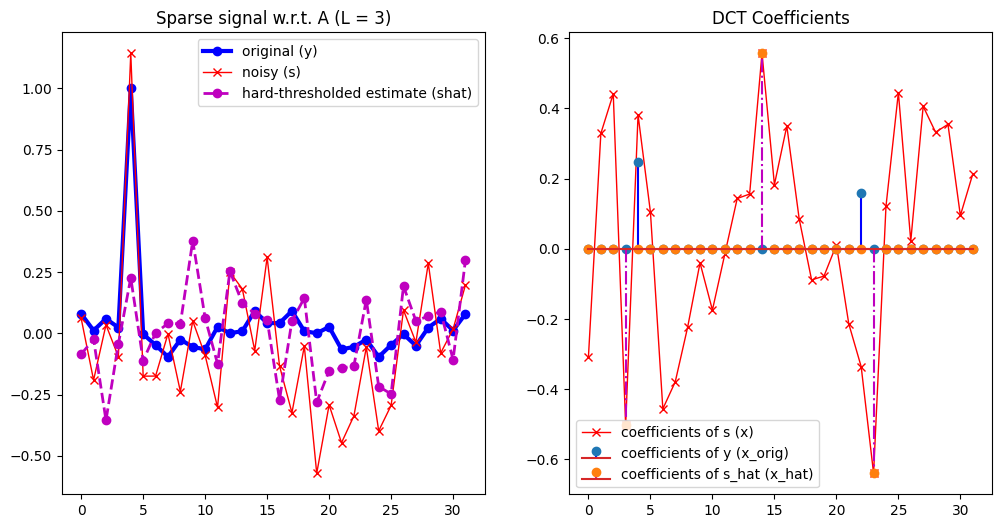

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(y, 'b-o', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-x', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm--o', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t. A (L = {L:.0f})')
ax[0].legend(['original (y)', 'noisy (s)', 'hard-thresholded estimate (shat)'])


ax[1].plot(x, 'r-x', linewidth=LN_WDT-1)
ax[1].stem(x_orig, linefmt='b-', markerfmt='C0o')
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s (x)', 'coefficients of y (x_orig)', 'coefficients of s_hat (x_hat)'])

## Tichonov Regularization


Compute the representation w.r.t. $A = [C, D]$ using Tichonov's regularization (try differente value for $\lambda$)

We have that:
$\hat{x} = \text{arg min } J(x)$ 

$J(x) = \frac{1}{2}*||Dx-s||_2^2 + \lambda||x||_2^2$

The x that minimize it is:

$x = (D^TD+λI_d)^{-1}D^TS$

In [170]:
A = np.concatenate((C, D), axis=1)
D = A
lmbda = 0.5
x_hat_tic = np.dot(np.dot(np.linalg.inv(np.dot(D.T, D) + lmbda * np.identity(D.shape[1])),D.T), y)
s_hat_tic = np.dot(D, x_hat_tic)


Show the results

Text(0.5, 1.0, 'Coefficients w.r.t. A')

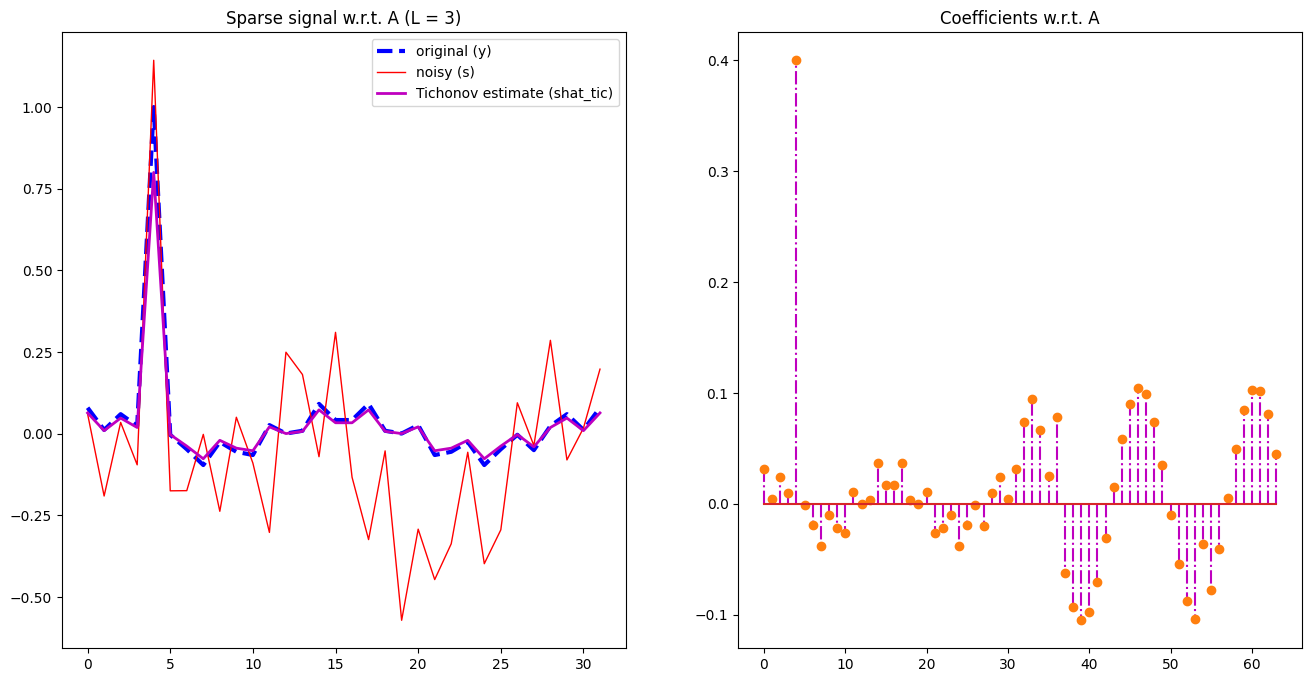

In [171]:
LN_WDT = 2
MRK_SZ = 10

fix, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(y, 'b--', linewidth=LN_WDT + 1)
ax[0].plot(s, 'r-', linewidth=LN_WDT - 1)
ax[0].plot(s_hat_tic, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t. A (L = {L:.0f})')
ax[0].legend(['original (y)', 'noisy (s)', 'Tichonov estimate (shat_tic)'])

ax[1].stem(x_hat_tic, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('Coefficients w.r.t. A')

# Assignment 2

Proof that if a set of vectors $\{e_i\}$, $e_i \in \mathbb{R}^M$, are linearly independent and if
$$
\mathbf{v} = \sum_i x_i e_i, \quad x_i \in \mathbb{R}
$$
then the representation $\{x_i\}$ is unique.

## Proof

Let's suppose there are two different representations of $x_i$, then:

$$
v = \sum y_i*v_i = \sum x_i*v_i
$$

then,

$$
\sum (y_i - x_i)*v_i = 0
$$

since $v_i$ are linearly independent then:

$$
y_i - x_i = 0\\
y_i = x_i
$$

So the representations are the same.
